# Visibility check

This notebook is to verify that widgets that are not visible do not perform any draws.


In [1]:
import asyncio
import numpy as np
from jupyter_rfb import RemoteFrameBuffer

In [2]:
class ProgressBar(RemoteFrameBuffer):
    
    i = 0
    n = 32
    channel = 0
    callback = lambda *args: None
    
    def get_frame(self):
        self.callback()
        self.i += 1
        if self.i >= self.n:
            self.i = 0
        array = np.zeros((100, 600, 3), np.uint8)
        array[:,: int(array.shape[1] * (self.i + 1) / self.n), self.channel] = 255
        return array

class AutoDrawWidget(ProgressBar):
    
    channel = 2  # blue
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        loop = asyncio.get_event_loop()
        loop.create_task(self._keep_at_it())
    
    async def _keep_at_it(self):
        while True:
            await asyncio.sleep(0.5)
            self.request_draw()
        

class IndicatorWidget(ProgressBar):
    channel = 1  # green

indicator = IndicatorWidget(css_width="600px", css_height="100px")
autodraw = AutoDrawWidget(css_width="600px", css_height="100px")
autodraw.callback = lambda *args: indicator.request_draw()

RFBOutputContext()

RFBOutputContext()

We display a widget that automatically keeps progressing. Actually, we create two views of that widgets to make sure that this works for multiple views.


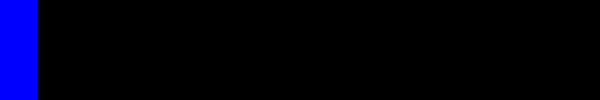

AutoDrawWidget(css_height='100px', css_width='600px')

In [3]:
autodraw


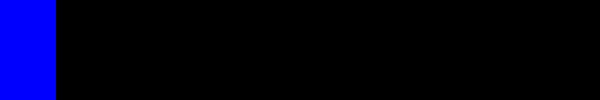

AutoDrawWidget(css_height='100px', css_width='600px')

In [4]:
autodraw

Some empty space ...

.

.

.

.

.

.

.

.

.

.

.
Then we display an indicator widget, that only progresses when the widget above is drawing.



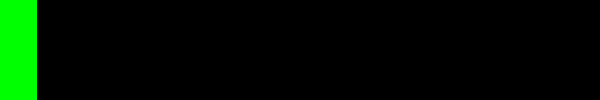

IndicatorWidget(css_height='100px', css_width='600px')

In [5]:
indicator

More empty space so there is something to scroll down to ...

.

.

.

.

.

.

.

.

.

.

.

.